# EDA

---

In [1]:
#import dependencies
import os
import csv
import sys
sys.path.append('../../')
from src import constants
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import defaultdict, Counter
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data directory path
data_directory = constants.CLEAN_DIR
output_directory = 'output/'

In [3]:
# #generate pandas profile report for all csvs
# for csv_file in os.listdir(path = data_directory):
#     if '.csv' in csv_file:
#         #track progress
#         print(f'Working on {csv_file}')
#         #read file into pandas df
#         data_frame = pd.read_csv(os.path.join(data_directory, csv_file))
#         #generate report for df
#         report = ProfileReport(data_frame)
#         #save report
#         report.to_file(f'{output_directory}/{csv_file[:-4]}_report.html')

Working on article_place.csv
Working on article_summary.csv
Working on image_person.csv
Working on article_person.csv
Working on article_event.csv
Working on article_person_type.csv
Working on article_org.csv
Working on article_subject.csv
Working on image_org.csv
Working on article_person_team.csv
Working on image_summary.csv
Working on image_ap_category.csv
Working on article_org_industry.csv
Working on image_subject.csv
Working on article_ap_category.csv
Working on image_person_team.csv
Working on image_org_industry.csv
Working on image_person_type.csv
Working on image_event.csv
Working on image_place.csv


### Summary Metadata

---

In [3]:
#read into pandas dataframe
article_summary = pd.read_csv(os.path.join(data_directory, 'article_summary.csv'))
media_summary = pd.read_csv(os.path.join(data_directory, 'image_summary.csv'))
media_subject = pd.read_csv(os.path.join(data_directory, 'image_subject.csv'))
print('Article: ')
print(f'Data shape: {article_summary.shape}')
print(f'Number of unique articles: {len(article_summary.id.unique())}')
print(f'Number of languages included: {len(article_summary.language.unique())} \n')
print('Media Files: ')
print(f'Data shape: {media_summary.shape}')
print(f'Number of unique media files: {len(media_summary.id.unique())}')
print(f'Type of media files: {media_summary.content_type.unique()}')
print(f'Number of languages included: {len(media_summary.language.unique())}')

Article: 
Data shape: (22602, 13)
Number of unique articles: 22602
Number of languages included: 1 

Media Files: 
Data shape: (78521, 13)
Number of unique media files: 78021
Type of media files: ['picture']
Number of languages included: 2


In [4]:
#get publishing datetime
article_summary.version_created = pd.to_datetime(article_summary.version_created)
media_summary.version_created = pd.to_datetime(media_summary.version_created)

print(f'Article published from {article_summary.version_created.min()} to {article_summary.version_created.max()}')
print(f'Media file published from {media_summary.version_created.min()} to {media_summary.version_created.max()}')

Article published from 2019-03-01 00:09:03+00:00 to 2019-09-08 13:00:59+00:00
Media file published from 2019-02-15 21:48:14+00:00 to 2019-09-30 13:18:50+00:00


### Tag Metadata

---

In [5]:
#tags category 
tags = ['_person', '_subject', '_org', '_place']

eda_tags = defaultdict(list)

for t in tags:
    for content in ['article', 'image']:
        file = content+t
        data = pd.read_csv(os.path.join(data_directory, file+'.csv'))
        print(f'{file}')
        print(f'Data shape: {data.shape}')
        print(f'Number of unique id: {len(data.id.unique())}')
        tag_label = t[1:]+'_tag'
        print(f'Number of unique tags: {len(data[tag_label].unique())}')
#         try:
#             file = file.replace('image', 'media')
#         except:
#             file = file
        eda_tags[file].append(len(data[tag_label].unique()))
        print()

article_person
Data shape: (57668, 4)
Number of unique id: 22602
Number of unique tags: 8485

image_person
Data shape: (85084, 5)
Number of unique id: 78021
Number of unique tags: 2827

article_subject
Data shape: (279796, 4)
Number of unique id: 22602
Number of unique tags: 3129

image_subject
Data shape: (253127, 5)
Number of unique id: 55145
Number of unique tags: 2096

article_org
Data shape: (40512, 4)
Number of unique id: 22602
Number of unique tags: 1522

image_org
Data shape: (100390, 5)
Number of unique id: 78021
Number of unique tags: 1357

article_place
Data shape: (105632, 4)
Number of unique id: 22602
Number of unique tags: 1323

image_place
Data shape: (327092, 5)
Number of unique id: 78021
Number of unique tags: 1318



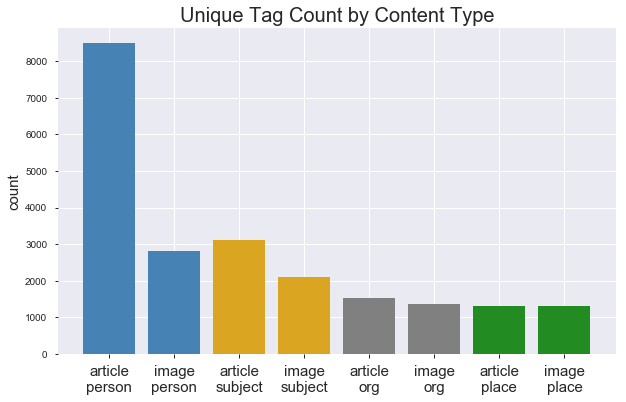

In [6]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(range(len(eda_tags)), [x[0] for x in eda_tags.values()],
       color = ['steelblue', 'steelblue', 'goldenrod','goldenrod','gray', 'gray', 
                'forestgreen', 'forestgreen'])
ax.set_xticks(range(len(eda_tags)))
ax.set_xticklabels([x.replace('_', '\n') for x in list(eda_tags.keys())], fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
ax.set_title('Unique Tag Count by Content Type', fontsize = 20)
plt.show()

In [7]:
fig.savefig(f'{output_directory}unique_tag_dist.jpg')